# Challenge 2: Freezing Fritz

Freezing Fritz, is a pretty cool guy. He has one problem, though. In his house, it is quite often too cold or to hot during the night. Then he has to get up and open or close his windows or turn on the heat. Needless to say, he would like to avoid this. 

However, his flat has three doors that he can keep open or closed, it has four radiators, and four windows. It seems like there are endless possibilities of prepping the flat for whatever temperature the night will have. 

Fritz, does not want to play his luck any longer and decided to get active. He recorded the temperature outside and inside of his bedroom for the last year. Now he would like to find an prediction that, given the outside temperature, as well as a certain configuration of his flat, tells him how cold or warm his bedroom will become.

Can you help Freezing Fritz to find blissful sleep?

## Data Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcdefaults()
plt.rc("figure", figsize=(11.2, 6.3))
sns.set_theme(context = "notebook", style = "whitegrid", palette = "deep")

random_state = np.random.RandomState(0)

In [2]:
original_df = pd.read_csv("data_train_Temperature.csv")
original_df

,Window 1,Window 2,Window 3,Window 4,Heat Control 1,Heat Control 2,Heat Control 3,Heat Control 4,Door 1,Door 2,Door 3,Temperature Outside,Temperature Bed
0,0.0,0.0,1.0,1.0,0.0,5.0,1.0,1.0,0.0,1.0,1.0,8.232086,17.077426
1,0.0,0.0,1.0,1.0,1.0,4.0,1.0,3.0,1.0,1.0,1.0,5.935949,16.413221
2,1.0,1.0,1.0,0.0,1.0,5.0,5.0,3.0,0.0,0.0,1.0,10.550271,23.228559
3,0.0,1.0,1.0,0.0,4.0,3.0,3.0,3.0,1.0,0.0,0.0,2.591696,16.224344
4,1.0,0.0,0.0,1.0,2.0,1.0,4.0,0.0,1.0,1.0,1.0,18.516631,21.047208
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.0,1.0,0.0,0.0,3.0,5.0,5.0,5.0,0.0,0.0,0.0,3.049163,26.011447
726,0.0,0.0,0.0,0.0,5.0,1.0,2.0,0.0,1.0,1.0,1.0,14.723168,25.502695
727,0.0,1.0,1.0,1.0,5.0,5.0,3.0,5.0,0.0,1.0,1.0,7.907167,19.478236
728,1.0,1.0,1.0,1.0,4.0,5.0,2.0,2.0,0.0,1.0,0.0,20.811523,22.482037


In [3]:
original_df.describe()

,Window 1,Window 2,Window 3,Window 4,Heat Control 1,Heat Control 2,Heat Control 3,Heat Control 4,Door 1,Door 2,Door 3,Temperature Outside,Temperature Bed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.478082,0.473973,0.473973,0.502740,2.450685,2.561644,2.515068,2.416438,0.475342,0.471233,0.513699,8.211303,19.624089
std,0.499862,0.499664,0.499664,0.500335,1.735107,1.710825,1.734953,1.695391,0.499734,0.499514,0.500155,7.857266,3.915569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.945738,9.246765
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.377688,16.473373
50%,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1.000000,7.660876,20.289835
75%,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,15.096424,22.714459
max,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,21.982949,28.306661


We use the correlation matrix again to see how each of the parameters of the problem affect the temperature in the bedroom. We also look at how the trade-off between outside and inside temperature is affected by some of the parameters.

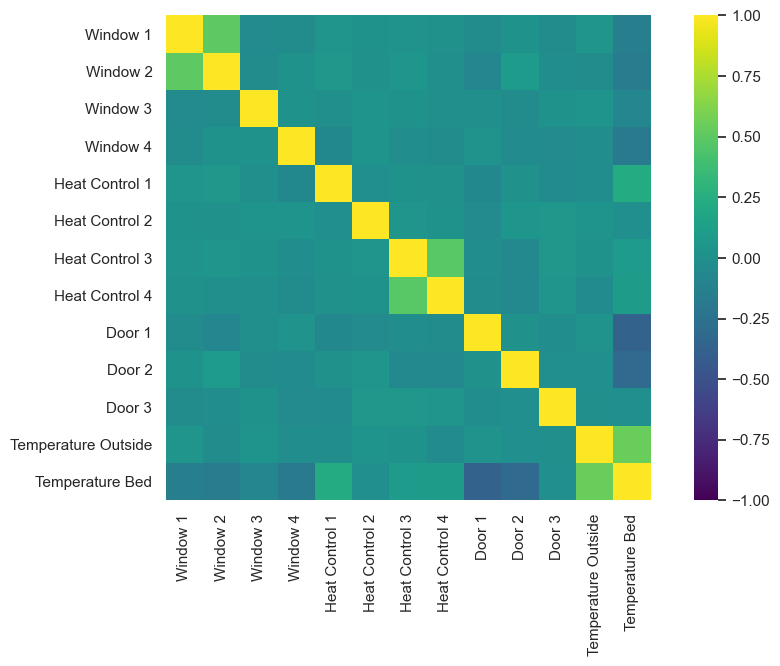

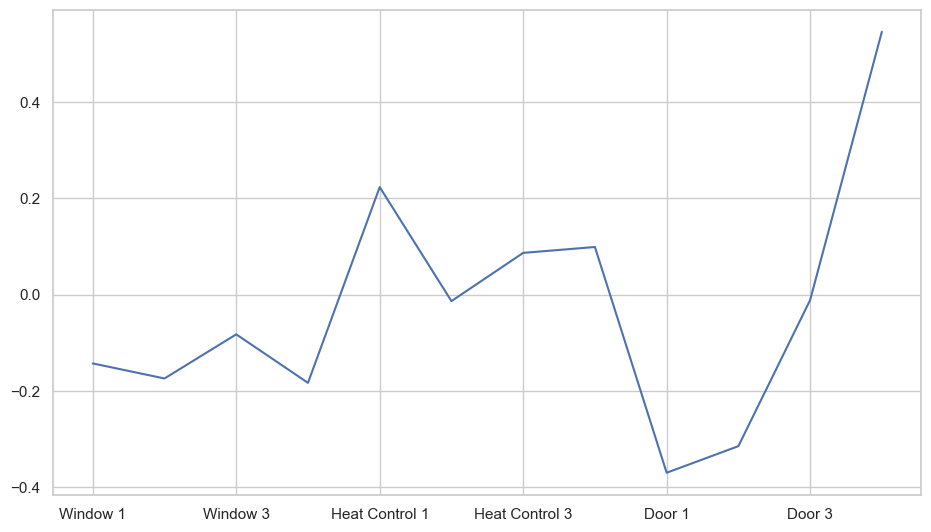

In [4]:
corr_matrix = original_df.corr()

sns.heatmap(corr_matrix, vmin = -1, vmax = 1, cmap = "viridis", annot = False, square = True)
plt.show()

corr_matrix["Temperature Bed"][:-1].plot()
plt.show()

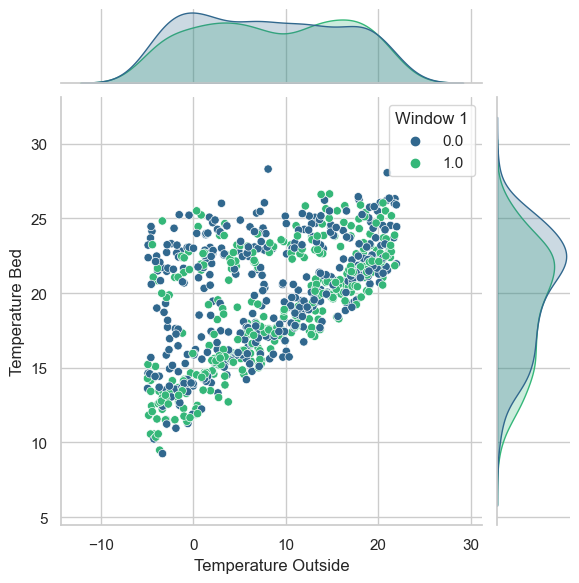

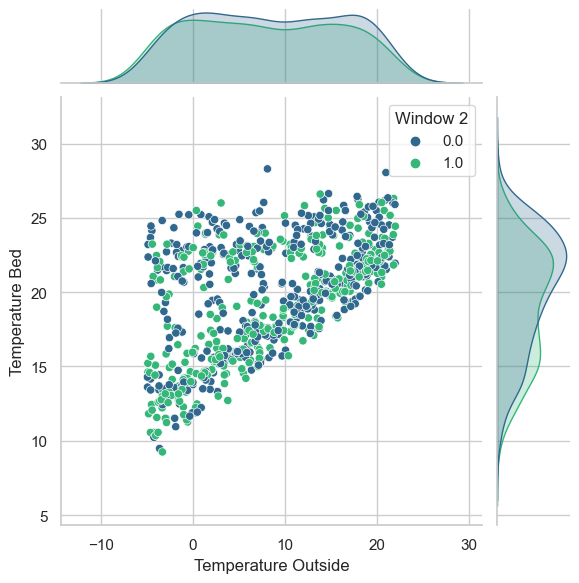

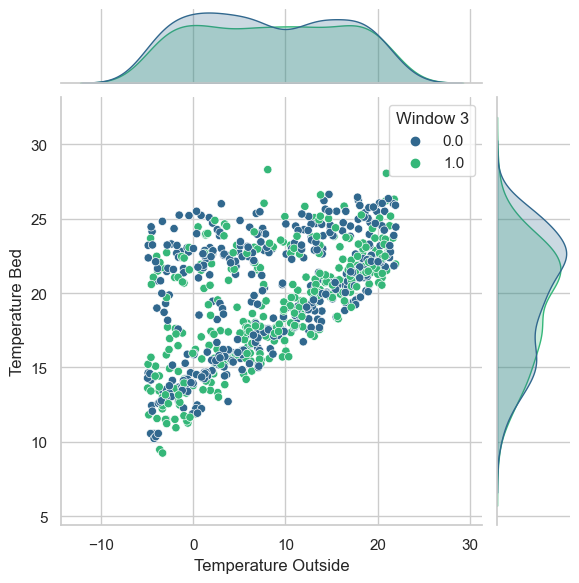

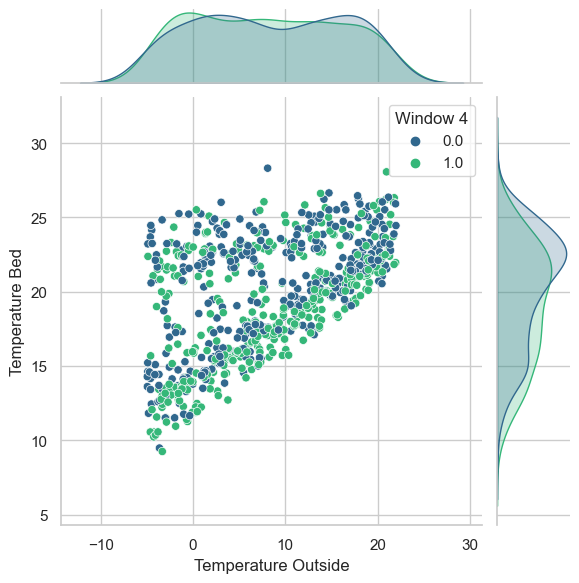

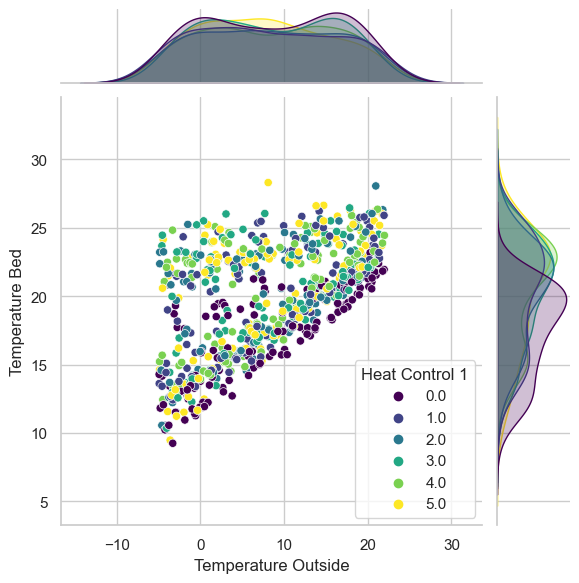

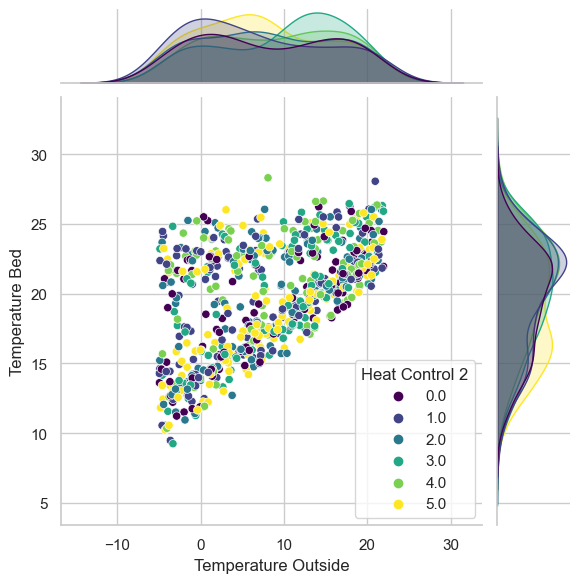

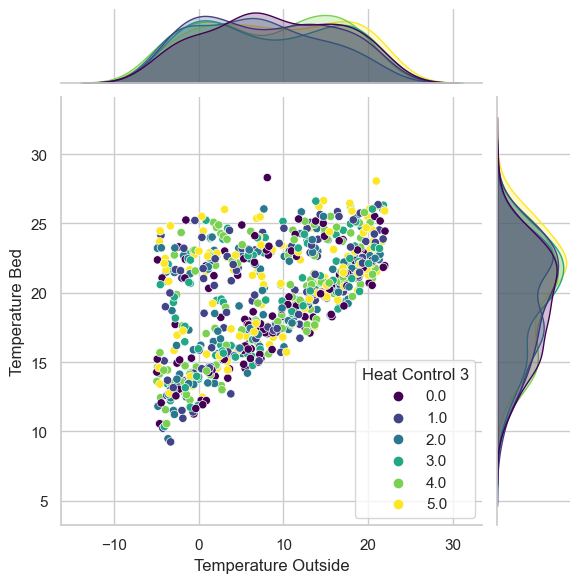

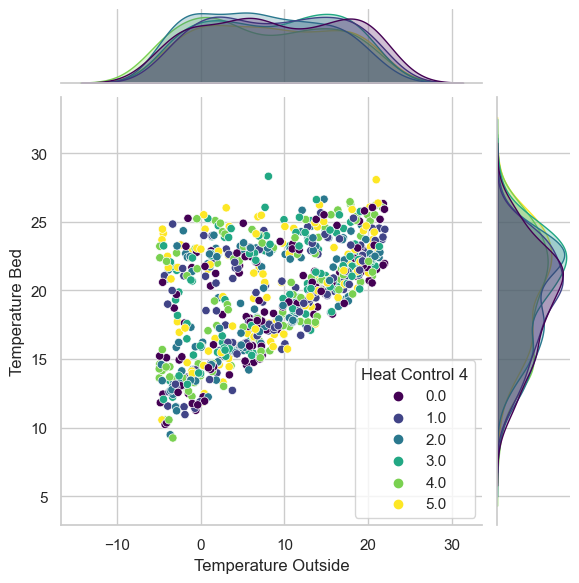

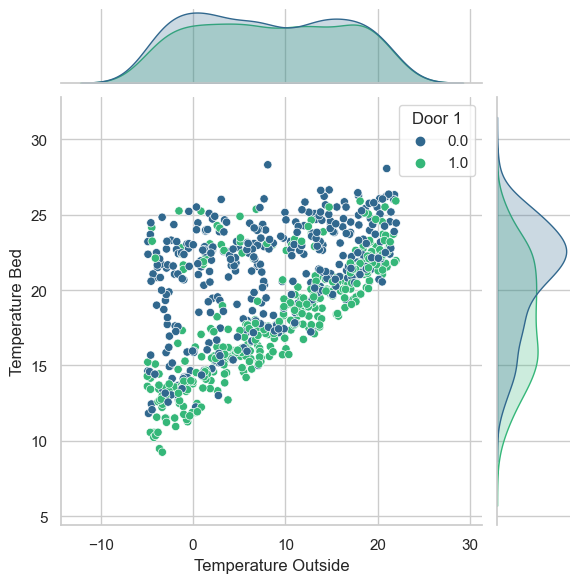

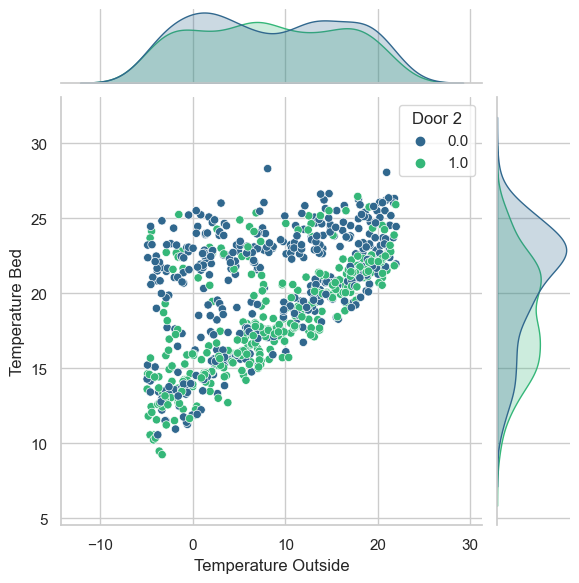

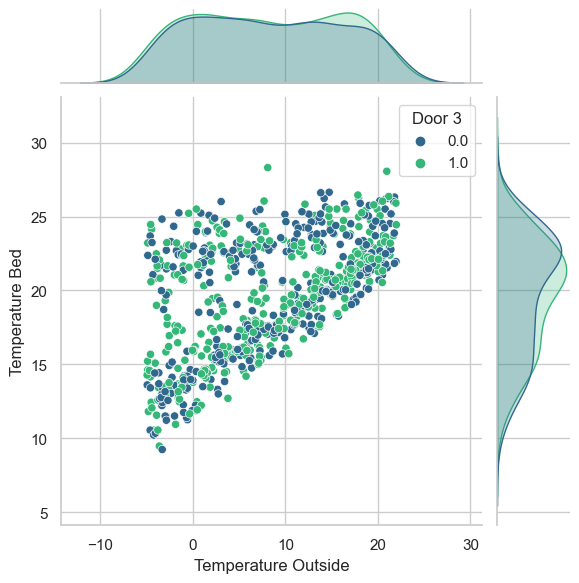

In [5]:
for column in original_df.columns[:-2]:
    sns.jointplot(data = original_df, x = "Temperature Outside", y = "Temperature Bed", hue = column, palette = "viridis")
plt.show()

### Principal Component Analysis

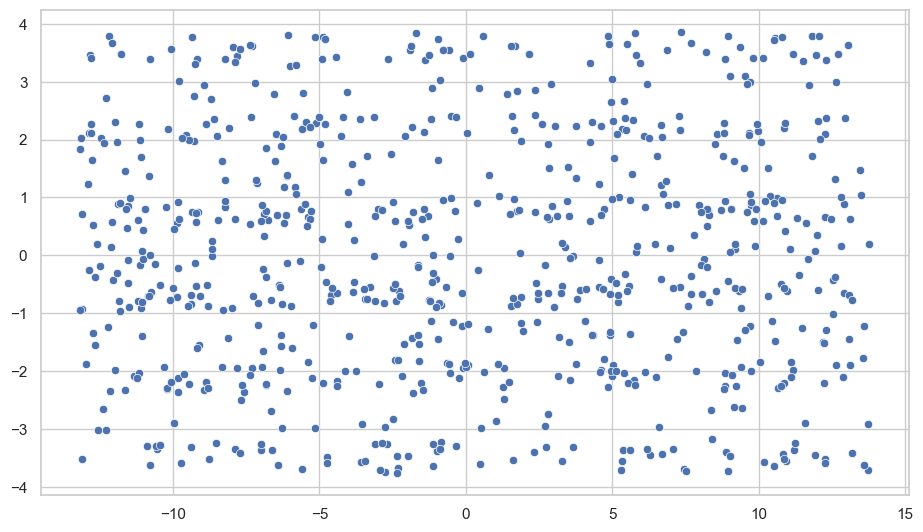

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state = random_state)
X_pca = pca.fit_transform(original_df.values[:, :-1])

sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1])
plt.show()

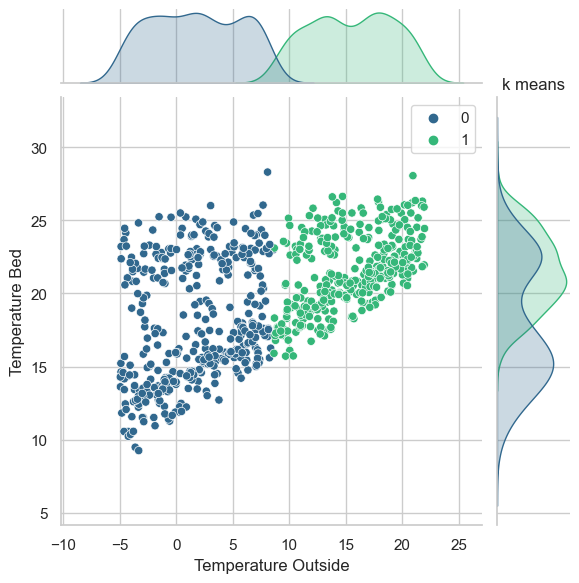

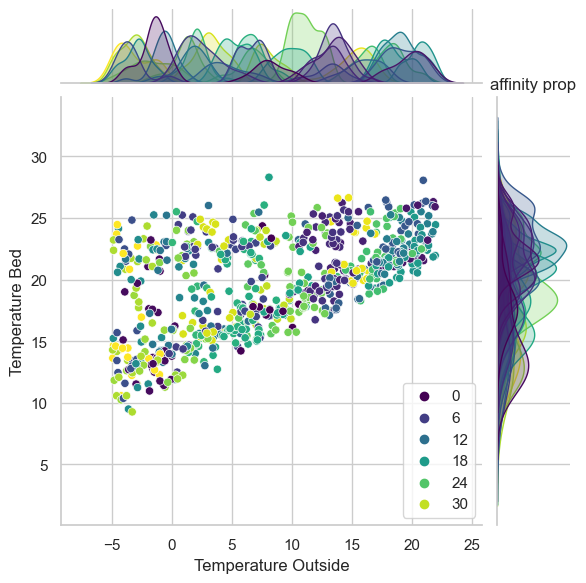

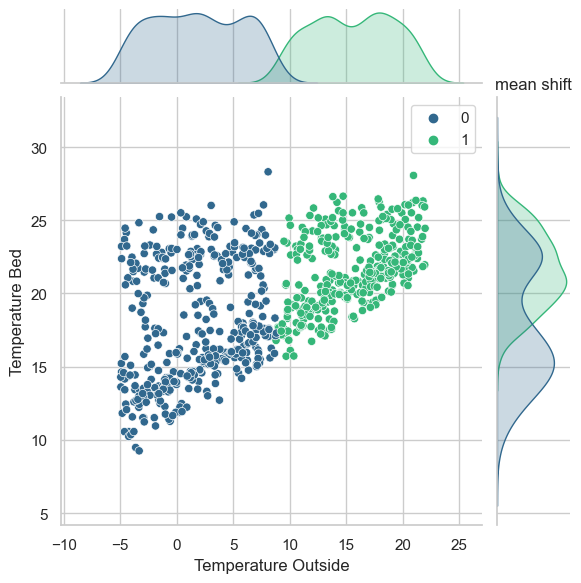

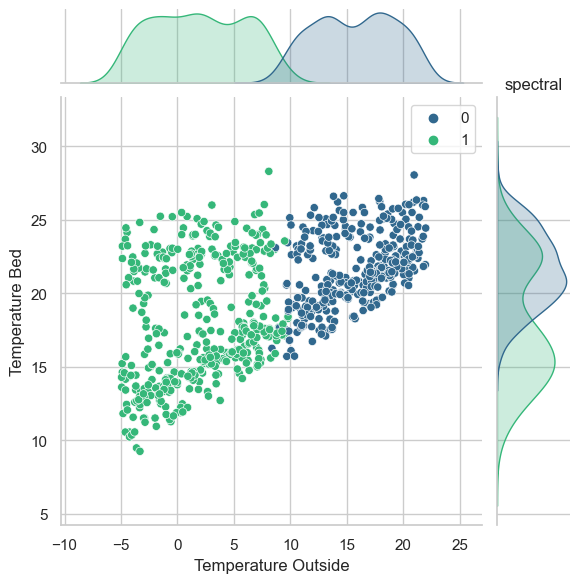

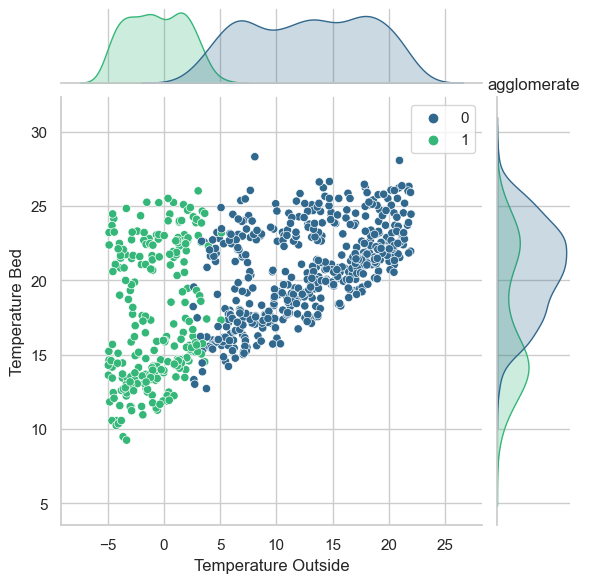

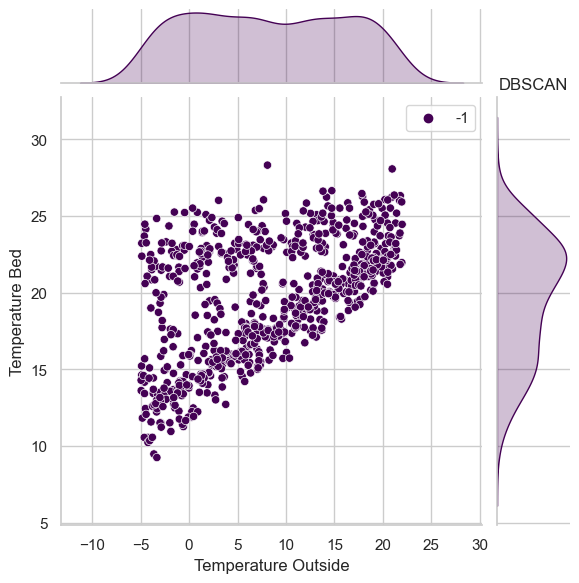

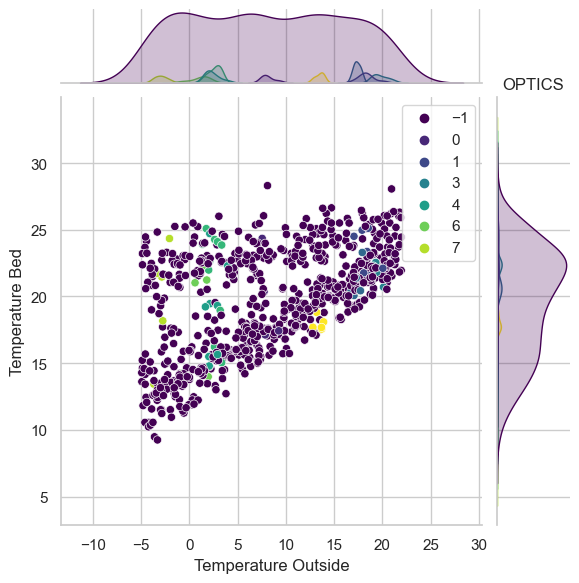

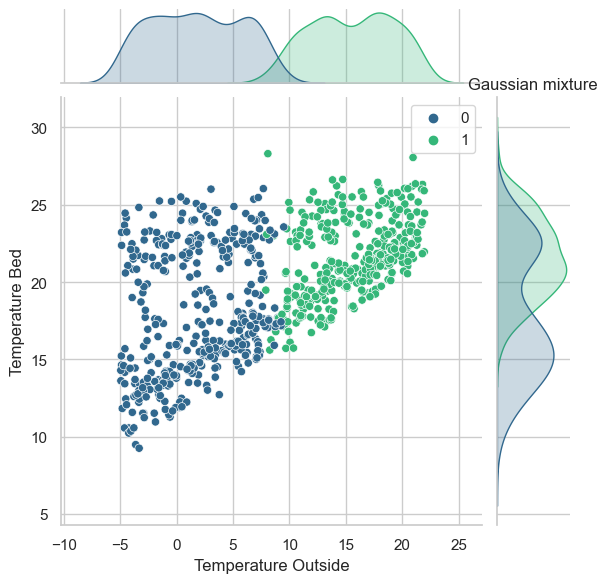

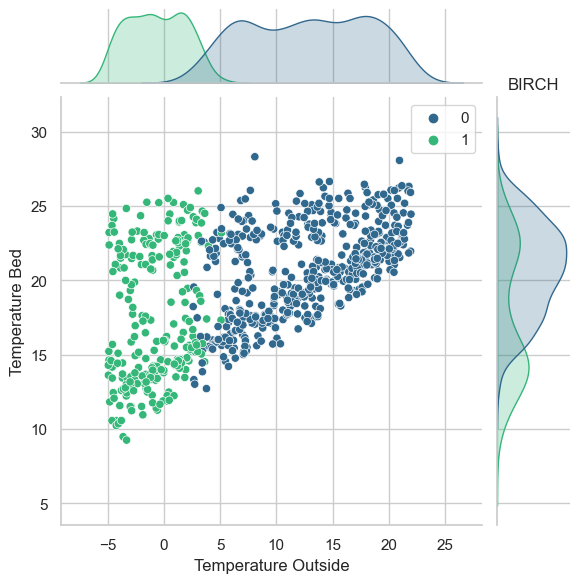

In [7]:
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN, OPTICS, Birch
from sklearn.mixture import GaussianMixture

X = original_df.values[:, :-1]

clusterers = {
    "k means" : KMeans(n_clusters = 2),
    "affinity prop" : AffinityPropagation(random_state = random_state),
    "mean shift" : MeanShift(),
    "spectral" : SpectralClustering(n_clusters = 2),
    "agglomerate" : AgglomerativeClustering(n_clusters = 2),
    "DBSCAN" : DBSCAN(),
    "OPTICS" : OPTICS(),
    "Gaussian mixture" : GaussianMixture(n_components = 2),
    "BIRCH" : Birch(n_clusters = 2)
}

for name, clst in clusterers.items():
    pred = clst.fit_predict(X)
    sns.jointplot(data = original_df, x = "Temperature Outside", y = "Temperature Bed", hue = pred, palette = "viridis")
    plt.title(name)
    plt.show()

### Define Regressor

My idea is to interpolate over the data but weigh it according to my observations and domain knowledge. So I give low weights to windows 2 and 3. Same with door 3. Then I also think that the doors are more important for the overall value than the individual heaters. My predictor is now a simple inverse distance weighting interpolation.

In [8]:
class PetersenRegressor:
    
    def __init__(self, p = 4, weights = None):
        self.p = p
        if weights is None:
            self.weights = [10, 0.1, 1, 10, 1, 1, 1, 1, 10, 10, 1, 1]
        else:
            self.weights = weights
    
    
    def distance(self, x, y):
        return np.linalg.norm(self.weights * (x - y))
    
        
    def predict(self, X):
        if self.weights is None or self.X is None or self.Y is None:
            raise Exception("Not fitted yet!")
                
        prediction = np.zeros(X.shape[0])
        
        for k, row in enumerate(X):
            # index if row is already in fitted data
            index = np.where(np.all(row == self.X, axis = 1))[0]
            
            if index.size == 0:
                # inverse distance weighting
                inverse_distance_weights = np.array([1 / self.distance(row, x)**self.p for x in self.X])
                value = np.sum(self.Y * inverse_distance_weights)
                total_inverse_distance = np.sum(inverse_distance_weights)
                prediction[k] = value / total_inverse_distance
                
            else:
                prediction[k] = self.Y[index[0]]
            
        return prediction
        
        
    def fit(self, X, Y):
        n = X.shape[1]
        m = len(self.weights)
        if n != m:
            raise Exception(f"Weights do not fit the training data: {m} vs {n}")
        self.X = X
        self.Y = Y
        
        
    def score(self, X, Y):
        # root mean squared error
        return np.linalg.norm(self.predict(X) - Y) / np.sqrt(Y.shape[0])
    
    def get_params(self, deep):
        # for compatability with sklearn
        return {}

## Model Selection

We train on 80% of the data and then test on the remaining 20%.

In [9]:
from sklearn.model_selection import train_test_split

X = original_df.values[:, :-1]
y = original_df["Temperature Bed"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = random_state)

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, TheilSenRegressor, RANSACRegressor, Ridge, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Sum, WhiteKernel, DotProduct
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

regressors = {
    "Petersen" :          PetersenRegressor(),
    "Nearest Neighbors" : KNeighborsRegressor(),
    "linear Model" :      LinearRegression(),
    "linear SVM" :        SVR(kernel = "linear"),
    "polynomial SVM":     SVR(kernel = "poly"),
    "radial SVM":         SVR(kernel = "rbf"),
    "Theil-Sen" :         TheilSenRegressor(random_state = random_state),
    "RANSAC" :            RANSACRegressor(random_state = random_state),
    "Ridge" :             Ridge(random_state = random_state),
    "Bayesian Ridge" :    BayesianRidge(),
    "linear Ridge" :      KernelRidge(kernel = "linear"),
    "polynomial Ridge":   KernelRidge(kernel = "poly"),
    "radial Ridge":       KernelRidge(kernel = "rbf"),
    "Gaussian Process" :  GaussianProcessRegressor(kernel = Sum(DotProduct(), WhiteKernel()), random_state = random_state),
    "Decision Tree" :     DecisionTreeRegressor(random_state = random_state),
    "Random Forest" :     RandomForestRegressor(random_state = random_state),
    "Ada Boost" :         AdaBoostRegressor(random_state = random_state),
    "Gradient Boost" :    GradientBoostingRegressor(random_state = random_state),
    "Neural Network" :    MLPRegressor(max_iter = 2000, alpha = 1, random_state = random_state)
}

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, explained_variance_score

comparison = pd.DataFrame()

for name, reg in regressors.items():
    print(f"{name:17} : ", end="")
    reg.fit(X_train, y_train)
    print("fitted, ", end="")
    prediction = reg.predict(X_test)
    print("predicted, ", end="")
    comparison.loc[name, "root mean squared"] = mean_squared_error(y_test, prediction, squared = False)
    comparison.loc[name, "mean absolute"] = mean_absolute_error(y_test, prediction)
    comparison.loc[name, "max"] = max_error(y_test, prediction)
    comparison.loc[name, "explained variance"] = explained_variance_score(y_test, prediction)
    print("scored.")

Petersen          : fitted, predicted, scored.
Nearest Neighbors : fitted, predicted, scored.
linear Model      : fitted, predicted, scored.
linear SVM        : fitted, predicted, scored.
polynomial SVM    : fitted, predicted, scored.
radial SVM        : fitted, predicted, scored.
Theil-Sen         : fitted, predicted, scored.
RANSAC            : fitted, predicted, scored.
Ridge             : fitted, predicted, scored.
Bayesian Ridge    : fitted, predicted, scored.
linear Ridge      : fitted, predicted, scored.
polynomial Ridge  : fitted, predicted, scored.
radial Ridge      : fitted, predicted, scored.
Gaussian Process  : fitted, predicted, scored.
Decision Tree     : fitted, predicted, scored.
Random Forest     : fitted, predicted, scored.
Ada Boost         : fitted, predicted, scored.
Gradient Boost    : fitted, predicted, scored.
Neural Network    : fitted, predicted, scored.


In [12]:
comparison.style.highlight_min(["root mean squared", "mean absolute", "max"], "green").highlight_max("explained variance", "green")

,root mean squared,mean absolute,max,explained variance
Petersen,2.078259,1.568692,6.628713,0.738630
Nearest Neighbors,3.185035,2.550358,8.170571,0.387948
linear Model,2.025939,1.581904,5.154129,0.750255
linear SVM,2.155029,1.619794,6.126573,0.725492
polynomial SVM,3.144976,2.637685,5.615002,0.402343
radial SVM,2.686862,2.098812,7.249750,0.599841
Theil-Sen,2.045040,1.604949,5.156646,0.745516
RANSAC,3.095633,2.312112,8.528125,0.506318
Ridge,2.027228,1.584641,5.159277,0.749936
Bayesian Ridge,2.030454,1.590973,5.171165,0.749138


### Optimize Weights

In [13]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

f_reg = SelectKBest(f_regression, k = "all").fit(X, y).scores_
mi_reg = SelectKBest(mutual_info_regression, k = "all").fit(X, y).scores_

weights = {
    "ones" : np.ones(12),
    "Petersen" : [10, 1, 1, 10, 1, 1, 1, 1, 10, 10, 1, 1],
    "more Petersen" : [1000, 1, 1, 1000, 1, 1, 1, 1, 1000, 1000, 1, 1],
    "even more" : [100000, 1, 1, 100000, 1, 1, 1, 1, 100000, 100000, 1, 1],
    "f score" : f_reg,
    "mutual info" : mi_reg,
    "correlation" : corr_matrix["Temperature Bed"][:-1]
}

rms = pd.DataFrame()

for name, weight in weights.items():
    reg = PetersenRegressor(weights = weight)
    reg.fit(X_train, y_train)
    rms.loc[name, "RMS"] = reg.score(X_test, y_test)

rms.style.highlight_min(color = "green")

,RMS
ones,3.011615
Petersen,2.051426
more Petersen,1.977776
even more,1.977776
f score,2.531238
mutual info,3.163428
correlation,2.501316


## Save Prediction

In [14]:
'''data_test_Temperature = pd.read_csv('data_test_Temperature.csv')
prediction = predict(data_test_Temperature)
predicted_Temperatures = prediction.values[:,-1]
    
np.savetxt('PhilippPetersens_Temperature_prediction.csv', predicted_Temperatures, delimiter=',') '''

"data_test_Temperature = pd.read_csv('data_test_Temperature.csv')\nprediction = predict(data_test_Temperature)\npredicted_Temperatures = prediction.values[:,-1]\n    \nnp.savetxt('PhilippPetersens_Temperature_prediction.csv', predicted_Temperatures, delimiter=',') "